In [1]:
import tensorflow as tf

In [2]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

In [3]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


LABEL: 0

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0  11 142 200 106   0   0   0   0   0   0   0  85 185 112   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 152 214 217 194 236 216 187 149 135 153 211 217 231 205 217 188  34   0   0   0   0   0]
 [  0   0   0   0   0  66 185 166 180 181 190 211 221 197 146 198 206 191 168 190 172 188 175   0   0   0   0   0]
 [  0   0   0   0   0 135 153 160 175 180 170 186 187 190 188 190 187 174 195 185 174 161 175  59   0   0   0   0]
 [  0   0   0   0   0 161 147 160 170 178 177 180 168 173 174 171 185 184 185 172 171 164 174 120   0   0   0   0]
 [  0   0   0   0   2 175 146 145 168 178 181 185 180 184 178 179 187 191 193 190 181 171 172 158   0   0   0   0]
 [  0   0   0   0  35 177 155 140 151 172 191 187 186 187 186 187 182 191 194 188 180 161 161 185   0   0   0   0]
 [  0   0   0   0  59 170 153 141 120 154 160 161 172 168 166 161 165 172 170 164 139 149 162 166  21   0   0   0]
 [  0   0   0   0  79 145 160 214 123 128 153 160 

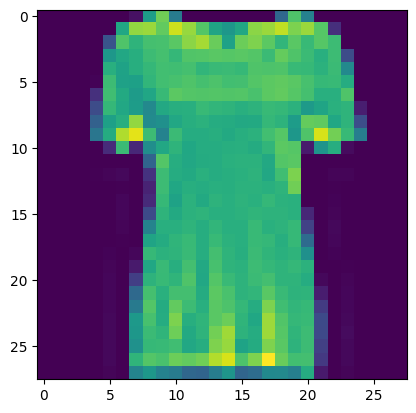

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 10

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: { training_labels[index] }')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])


In [11]:
# Normalize the pixel values of the train and test images
training_images = training_images/255.0
test_images = test_images/255.0

In [13]:
# Build the classification model
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softplus)
    ]
)

In [18]:
model.compile(
    optimizer= tf.optimizers.Adam(),
    loss= 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

model.fit(training_images,training_labels,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 780us/step - accuracy: 0.9336 - loss: 0.1805
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 763us/step - accuracy: 0.9342 - loss: 0.1722
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 785us/step - accuracy: 0.9364 - loss: 0.1683
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 770us/step - accuracy: 0.9370 - loss: 0.1675
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 792us/step - accuracy: 0.9378 - loss: 0.1659


In [19]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - accuracy: 0.8872 - loss: 0.3769


[0.3758978843688965, 0.8881000280380249]

In [23]:
# Exercise 1
classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step
[2.3535923e-13 6.5046687e-23 3.5682923e-15 7.3268218e-17 1.0303618e-17 2.0112223e-06 3.2439332e-11 8.5850137e-05 1.8412911e-13 8.6197695e-03]
9


In [27]:
#Exercise 2
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 763us/step - loss: 0.6297
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 763us/step - loss: 0.3801
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 771us/step - loss: 0.3365
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 762us/step - loss: 0.3119
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - loss: 0.2977
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 0.3415
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
[2.6366288e-07 2.7243781e-08 1.3577413e-06 5.6450085e-07 1.2932130e-06 8.9722360e-03 1.7695208e-07 4.5697249e-02 3.5180423e-05 9.4529170e-01]
9


In [29]:
# Exercise 3
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 858us/step - loss: 0.6449
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 779us/step - loss: 0.3890
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 793us/step - loss: 0.3388
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 760us/step - loss: 0.3090
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 749us/step - loss: 0.2970
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - loss: 0.3500
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
[4.1598622e-07 4.4471246e-08 9.9240360e-08 1.8808281e-07 7.6030926e-07 1.7069528e-03 6.0685311e-06 5.0886716e-03 9.4895531e-06 9.9318731e-01]
9


In [30]:
#Exercise 8
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.6): # Experiment with changing this value
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])


Epoch 1/5
1855/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7939 - loss: 0.5852
Reached 60% accuracy so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7943 - loss: 0.5840
